<a href="https://colab.research.google.com/github/Mogarthron/Magazynier/blob/master/ZAM_PIANKI_DB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sqlalchemy import create_engine, Column, String, Integer, Numeric, text
from sqlalchemy.orm import declarative_base, sessionmaker
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sqlalchemy import update, insert, delete

Base = declarative_base()

class ZAM_PIANKI(Base):
  __tablename__ = "ZAM_PIANKI"

  lp = Column("LP", Integer, autoincrement=True,  primary_key=True)

  tydzien = Column("TYDZIEN", Integer)
  kod = Column("KOD", String)
  model = Column("MODEL", String)
  nr_kompletacji = Column("NR_KOMPLETACJI", String(5))
  opis = Column("OPIS", String)
  ile_zam = Column("ILE_ZAMOWIONE", Numeric)
  znacznik_dostawcy = Column("ZNACZNIK_DOSTAWCY", String(2))
  galanteria = Column("GALANTERIA", String(1))
  siedziska_HR = Column("SIEDZISKA_HR", String(1))
  leniwa = Column("LENIWA", String(1))
  zam1 = Column("ZAM1", String(7))
  zam2 = Column("ZAM2", String(7))
  uwagi = Column("UWAGI", String)


  potw_dos1 = Column("POTW_DATA_DOS_1", String)
  potw_dos2 = Column("POTW_DATA_DOS_2", String)
  data_dos1 = Column("DATA_DOSTARCZENIA_1", String(10))
  data_dos2 = Column("DATA_DOSTARCZENIA_2", String(10))

  status_leniwa = Column("STATUS_LENIWA", String(30))
  status_leniwa_skoks = Column("STATUS_LENIWA_SKOSOWANIE", String(30))
  status_owaty = Column("STATUS_OWATY", String(30))
  nr_pz = Column("nr_PZ", String)
  nr_pw = Column("nr_PW", String)
  status_kompletacja = Column("STATUS_KOMPLETACJA", String(50))
  nr_samochodu = Column("nr_SAMOCHODU", String(50))

  def __init__(self, tydzien=None, model=None, kod=None, opis=None, ile_zam=None, znacznik_dostawcy=None, galanteria=None, siedziska_HR=None, leniwa=None, nr_kompletacji=None, zam1=None, zam2=None, uwagi=None):
    self.tydzien = tydzien
    self.kod = kod
    self.model = model
    self.nr_kompletacji = nr_kompletacji
    self.opis = opis
    self.ile_zam = ile_zam
    self.znacznik_dostawcy = znacznik_dostawcy
    self.galanteria = galanteria
    self.siedziska_HR = siedziska_HR
    self.leniwa = leniwa
    self.zam1 = zam1
    self.zam2 = zam2
    self.uwagi = uwagi

  def __repr__(self):
    return f"{self.tydzien}, {self.opis}"


def ZAM_PIANKI_update_date_dos_zam(nr_zam1=None, nr_zam2=None, potwierdzona_data_dos1=None, potwierdzona_data_dos2=None):
  if nr_zam1:
    stmt1 = (
        update(ZAM_PIANKI)
        .where(ZAM_PIANKI.zam1 == nr_zam1)
        .values(potw_dos1=potwierdzona_data_dos1)
      )
    with engine.begin() as conn:
      conn.execute(stmt1)

  if nr_zam2:
    stmt2 = (
        update(ZAM_PIANKI)
        .where(ZAM_PIANKI.zam2 == nr_zam2)
        .values(potw_dos2=potwierdzona_data_dos2)
      )
    with engine.begin() as conn:
      conn.execute(stmt2)

In [ ]:
engine = create_engine("sqlite:///drive/MyDrive/GENERATORY.db", echo=False)

In [ ]:
pz = pd.read_excel("drive/MyDrive/ZAM_PIANKI.xlsx", sheet_name="PZ")
pz_poz = pd.read_excel("drive/MyDrive/ZAM_PIANKI.xlsx", sheet_name="PZ_POZ")
aktywne_dos = pd.read_excel("drive/MyDrive/ZAM_PIANKI.xlsx", sheet_name="AKTYWNE_DOS")
pw = pd.read_excel("drive/MyDrive/ZAM_PIANKI.xlsx", sheet_name="PW")

pz["PZ"] = pz.Numer.apply(lambda x: x[-7:])
pz["DOS"] = pz.KARTA_LIMIT.apply(lambda x: x[4:11])

pz_poz = pz_poz.merge(pz[["PZ", "DOS", "Data", "Obiekt docelowy"]], how="left", on="PZ")

In [ ]:
Base.metadata.create_all(bind=engine)

Session = sessionmaker(bind=engine)
session = Session()


In [ ]:
# stmt = (update(ZAM_PIANKI)
#          .where(ZAM_PIANKI.lp.in_([ 107, 108,   3,   4,   5, 137,  30,  17,  18,  20,  21,  22,  45,
#         42, 144, 145,  19,  32]))
#          # .where((ZAM_PIANKI.model == "HUDSON"))# & (~ZAM_PIANKI.lp.in_([38,39,48,49,50,51])))
#          .values(status_kompletacja = "1" , nr_pw="24/14"))
#          # .values(galanteria = "C", siedziska_HR = "C", leniwa = "C"))#, pz = "24/0009"))
#          # .values(model = "HORIZON"))

# session.execute(stmt)
# session.commit()

In [ ]:
# stmt = (update(ZAM_PIANKI)
#         # .where(ZAM_PIANKI.lp.in_([77]))
#         .where((ZAM_PIANKI.zam1 == "24/0242"))# & (~ZAM_PIANKI.lp.in_([38,39,48,49,50,51])))
#         .values(nr_samochodu = "VITA 7_24"))
#         # .values(potw_dos1="29.01", potw_dos2="29.01>30.01>31.01", nr_kompletacji="1_24"))
#         # .values(galanteria = "C", siedziska_HR = "C", leniwa = "C"))#, pz = "24/0009"))
#         # .values(model = "HORIZON"))

# session.execute(stmt)
# session.commit()

In [ ]:
# delete_stmt = (
#      delete(ZAM_PIANKI)
#      .where(ZAM_PIANKI.lp.in_([28,29])))

# session.execute(delete_stmt)
# session.commit()


In [ ]:
with engine.begin() as conn:
  zam_pianki_db = pd.read_sql(text("select * from ZAM_PIANKI"), conn)
  zamowienia_niedostarczone = pd.read_sql(text("select LP, TYDZIEN, KOD, NR_KOMPLETACJI, OPIS, ILE_ZAMOWIONE, ZNACZNIK_DOSTAWCY, ZAM1, ZAM2, POTW_DATA_DOS_1, POTW_DATA_DOS_2, nr_SAMOCHODU from ZAM_PIANKI where STATUS_KOMPLETACJA is null"), conn)
  zns = pd.read_sql(text("select LP, KOD, NR_KOMPLETACJI, OPIS, ILE_ZAMOWIONE, ZNACZNIK_DOSTAWCY, POTW_DATA_DOS_1, POTW_DATA_DOS_2, DATA_DOSTARCZENIA_1, DATA_DOSTARCZENIA_2, nr_PZ, nr_PW, STATUS_KOMPLETACJA from ZAM_PIANKI where STATUS_KOMPLETACJA is not null and STATUS_KOMPLETACJA <> '1'"), conn)

zns["dostarczone"] = zns.apply(lambda x: x.ZNACZNIK_DOSTAWCY.__len__() == x.STATUS_KOMPLETACJA.__len__(), axis=1)
zamowienia_niespakowane = zns[zns.dostarczone][zns.columns[:-1]]

zpd = zam_pianki_db[["LP", "KOD", "TYDZIEN", "NR_KOMPLETACJI", "OPIS", "ILE_ZAMOWIONE", "ZNACZNIK_DOSTAWCY", "STATUS_KOMPLETACJA"]]
# zam_pianki_db[zam_pianki_db.MODEL == "STONE"][["LP", "MODEL", "TYDZIEN", "OPIS", "ILE_ZAMOWIONE", "ZAM1", "ZAM2", "UWAGI","POTW_DATA_DOS_1","POTW_DATA_DOS_2", "DATA_DOSTARCZENIA_1", "DATA_DOSTARCZENIA_2"]]
#DATY DOSTARCZENIA
# zam_pianki_db[zam_pianki_db.DATA_DOSTARCZENIA_2 == "2024-01-09"][["LP", "nr_PZ", "MODEL", "NR_KOMPLETACJI", "TYDZIEN", "OPIS", "ILE_ZAMOWIONE", "ZAM1", "ZAM2","POTW_DATA_DOS_1","POTW_DATA_DOS_2", "DATA_DOSTARCZENIA_1", "DATA_DOSTARCZENIA_2"]]
#SAMOCHODY
# zam_pianki_db[zam_pianki_db.POTW_DATA_DOS_1 == "29/01"][
#     ["LP", "TYDZIEN", "OPIS", "NR_KOMPLETACJI", "ILE_ZAMOWIONE", "ZAM1", "ZAM2","POTW_DATA_DOS_1", "POTW_DATA_DOS_2", "nr_SAMOCHODU"]]
#PIANKI
# zam_pianki_db[
#     ["LP", "MODEL", "OPIS", "NR_KOMPLETACJI", "GALANTERIA", "SIEDZISKA_HR", "LENIWA"]]
#PW
# _pw = pw[pw.PW == "24/05"].merge(zam_pianki_db[
#      ["LP", "KOD", "ILE_ZAMOWIONE", "DATA_DOSTARCZENIA_1", "DATA_DOSTARCZENIA_2", "ZNACZNIK_DOSTAWCY","STATUS_KOMPLETACJA"]], how="left", on="KOD")
# _pw[(_pw.OPIS.str.contains("REVERSO"))]

def przesuniecie_daty_dostawy(model, nr_kompletacji):
    return zam_pianki_db[(zam_pianki_db.MODEL == model)&(zam_pianki_db.NR_KOMPLETACJI == nr_kompletacji)&(zam_pianki_db.nr_PZ.isna())][["LP","OPIS","ILE_ZAMOWIONE","POTW_DATA_DOS_1","POTW_DATA_DOS_2","ZNACZNIK_DOSTAWCY","STATUS_KOMPLETACJA", "nr_SAMOCHODU"]]


#PZ
def przyjecie_pz(zam,model,nr_kompletacji):
  kol1 = ["LP", "KOD","OPIS","ILE_ZAMOWIONE"]
  if zam == "ZAM1":
    kol2 = ["POTW_DATA_DOS_1"]
  else:
    kol2 = ["POTW_DATA_DOS_2"]

  kol3 = ["ZNACZNIK_DOSTAWCY","STATUS_KOMPLETACJA", "nr_PZ"]

  return zam_pianki_db[(zam_pianki_db.MODEL == model)&(zam_pianki_db.NR_KOMPLETACJI == nr_kompletacji)&(zam_pianki_db.nr_PZ.isna())][kol1+kol2+kol3]


# przesuniecie_daty_dostawy("AMALFI", "2_23")
# zam_pianki_db[(zam_pianki_db.MODEL == "ONYX")&(zam_pianki_db.NR_KOMPLETACJI == "3_23")&(~zam_pianki_db.nr_PZ.isna())][["LP","OPIS","ILE_ZAMOWIONE","POTW_DATA_DOS_1","POTW_DATA_DOS_2","ZNACZNIK_DOSTAWCY","STATUS_KOMPLETACJA", "nr_SAMOCHODU"]]

In [ ]:
zamowienia_niedostarczone

,LP,TYDZIEN,KOD,NR_KOMPLETACJI,OPIS,ILE_ZAMOWIONE,ZNACZNIK_DOSTAWCY,ZAM1,ZAM2,POTW_DATA_DOS_1,POTW_DATA_DOS_2,nr_SAMOCHODU
0,125,2404,16.139.15000.60,1_24,"MAXWELL 1,5",100,P,23/0107,None,None,None,PIANPOL 5_24
1,126,2404,16.139.66000.60,1_24,MAXWELL N,40,P,23/0107,None,None,None,PIANPOL 5_24
2,127,2404,16.139.69300.60,1_24,MAXWELL Ons,20,P,23/0107,None,None,None,PIANPOL 5_24
3,128,2404,16.139.71300.60,1_24,MAXWELL P103x82,20,P,23/0107,None,None,None,PIANPOL 5_24
4,129,2404,16.139.00001.60,1_24,MAXWELL ][,100,P,23/0107,None,None,None,PIANPOL 5_24
...,...,...,...,...,...,...,...,...,...,...,...,...
81,206,2408,16.125.71600.60,2_24,STONE P106x106,10,V,24/0242,None,None,None,VITA 7_24
82,207,2408,16.125.71900.60,2_24,STONE P106x82,20,V,24/0242,None,None,None,VITA 7_24
83,208,2408,16.125.67300.60,2_24,STONE Z70,190,V,24/0242,None,None,None,VITA 7_24
84,209,2408,16.125.00004.60,2_24,STONE ][,250,V,24/0242,None,None,None,VITA 7_24


In [ ]:
zamowienia_niespakowane

,LP,KOD,NR_KOMPLETACJI,OPIS,ILE_ZAMOWIONE,ZNACZNIK_DOSTAWCY,POTW_DATA_DOS_1,POTW_DATA_DOS_2,DATA_DOSTARCZENIA_1,DATA_DOSTARCZENIA_2,nr_PZ,nr_PW,STATUS_KOMPLETACJA
0,38,16.135.69502.60,1_23,AMALFI RS] MEMORY,10,C,None,None,2023-12-09,None,None,23/64,C
1,39,16.135.63072.60,1_23,AMALFI LA] MEMORY,15,C,None,None,2023-12-09,None,None,23/64,C
2,41,16.135.25000.60,2_23,"AMALFI 2,5",25,CV,15.01>22.01>29.01>30.01>31.01>12.01,None,2024-02-12,2024-01-16,24/0025,None,CV
3,43,16.135.40000.60,2_23,AMALFI 4,10,CV,15.01>22.01>29.01>30.01>31.01>12.01,None,2024-02-12,2024-01-16,24/0025,None,CV
4,44,16.135.69031.60,2_23,AMALFI NT,15,CV,15.01>22.01>29.01>30.01>31.01>12.01,None,2024-02-12,2024-01-16,24/0025,None,CV
5,46,16.135.69200.60,2_23,AMALFI NW = WN,45,CV,15.01>22.01>29.01>30.01>31.01>12.01,None,2024-02-12,2024-01-16,24/0025,None,CV
6,47,16.135.69400.60,2_23,AMALFI [RS = RS],25,CV,15.01>22.01>29.01>30.01>31.01>12.01,None,2024-02-12,2024-01-16,24/0025,None,CV
7,48,16.135.69201.60,2_23,AMALFI NW MEMORY,35,C,15.01>22.01>29.01,None,2024-01-29,None,24/0014,24/06,C
8,49,16.135.69302.60,2_23,AMALFI WN MEMORY,25,C,15.01>22.01>29.01,None,2024-01-29,None,24/0014,24/06,C
9,50,16.135.69502.60,2_23,AMALFI RS] MEMORY,20,C,15.01>22.01>29.01,None,2024-01-29,None,24/0014,24/06,C


In [ ]:
# zpd.merge(pw[pw.PW == "24/10"], on="KOD", how="right")
pw_zpd = pw[pw.PW == "24/14"][["PW", "KOD", "OPIS", "ILOSC", "KOMPLETACJA"]].merge(zpd[~zpd.STATUS_KOMPLETACJA.isin(["1",None])][["TYDZIEN", "NR_KOMPLETACJI", "KOD", "LP", "ILE_ZAMOWIONE", "ZNACZNIK_DOSTAWCY", "STATUS_KOMPLETACJA"]], on="KOD", how="left")
# pw_zpd[~pw_zpd.STATUS_KOMPLETACJA.isin(["1",None])]
pw_zpd#.dropna().LP.astype(int).values

,PW,KOD,OPIS,ILOSC,KOMPLETACJA,TYDZIEN,NR_KOMPLETACJI,LP,ILE_ZAMOWIONE,ZNACZNIK_DOSTAWCY,STATUS_KOMPLETACJA
0,24/14,16.131.15000.60,"CALYPSO 1,5 - KOMPLET PIANEK",20,1_24,NaN,NaN,NaN,NaN,NaN,NaN
1,24/14,16.131.25000.60,"CALYPSO 2,5 - KOMPLET PIANEK",5,1_24,NaN,NaN,NaN,NaN,NaN,NaN
2,24/14,16.131.53083.60,CALYPSO [LAD - KOMPLET PIANEK,10,1_24,NaN,NaN,NaN,NaN,NaN,NaN
3,24/14,16.131.65004.60,CALYPSO [L2H - KOMPLET PIANEK,10,1_24,NaN,NaN,NaN,NaN,NaN,NaN
4,24/14,16.131.00001.60,CALYPSO ][ - KOMPLET PIANEK,60,1_24,NaN,NaN,NaN,NaN,NaN,NaN
5,24/14,16.117.50003.60,DIVA X5X - KOMPLET PIANEK,10,1_24,NaN,NaN,NaN,NaN,NaN,NaN
6,24/14,16.138.30000.60,OXYGEN 3 - KOMPLET PIANEK,40,1_24,NaN,NaN,NaN,NaN,NaN,NaN
7,24/14,16.138.35000.60,"OXYGEN 3,5 - KOMPLET PIANEK",20,1_24,NaN,NaN,NaN,NaN,NaN,NaN
8,24/14,16.138.65003.60,OXYGEN [L2H - KOMPLET PIANEK,20,1_24,NaN,NaN,NaN,NaN,NaN,NaN
9,24/14,16.138.00004.60,OXYGEN ][ - KOMPLET PIANEK,50,1_24,NaN,NaN,NaN,NaN,NaN,NaN


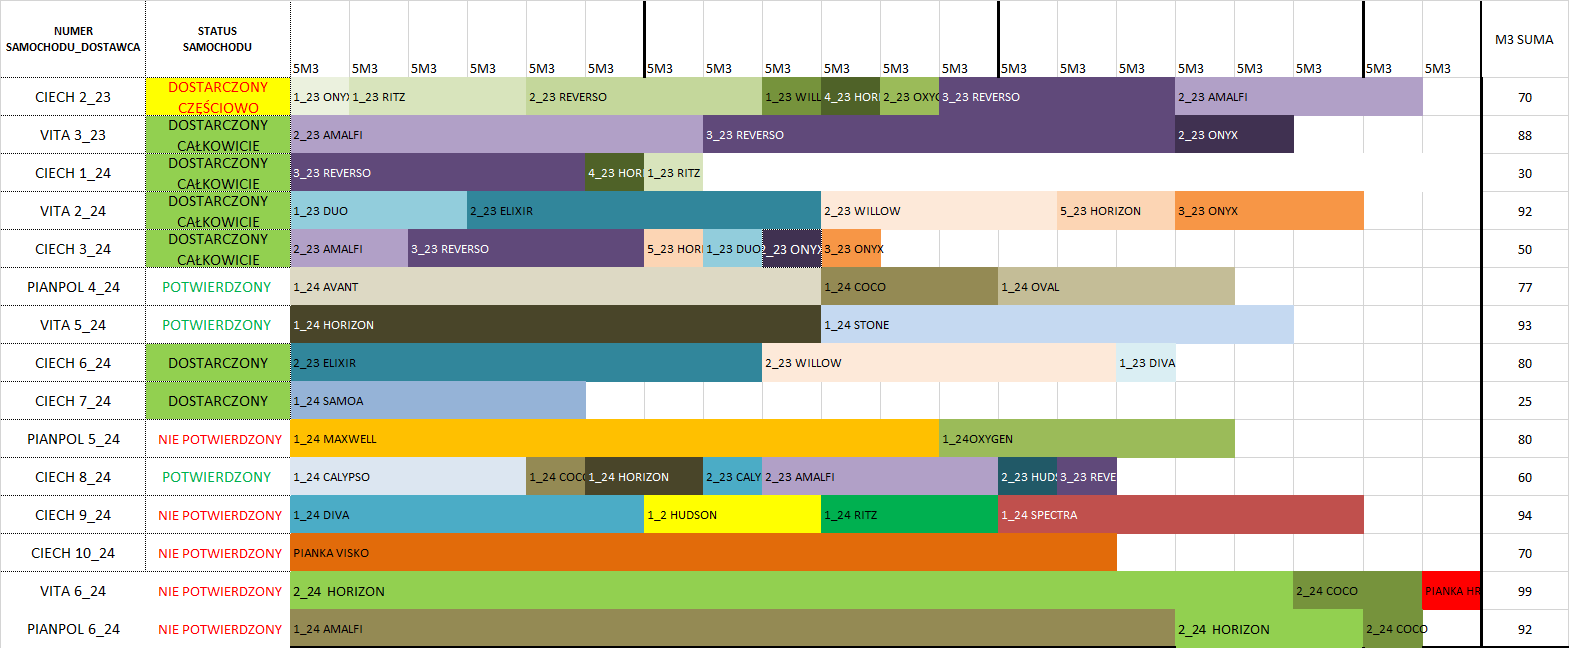

In [ ]:
nr_dostaw = zam_pianki_db[["LP", "MODEL", "NR_KOMPLETACJI", "OPIS", "DATA_DOSTARCZENIA_1", "DATA_DOSTARCZENIA_2", "nr_SAMOCHODU"]]
nr_dostaw["KOMPLETACJA"] = nr_dostaw.NR_KOMPLETACJI + " " + nr_dostaw.MODEL
nr_dostaw = nr_dostaw[["LP", "KOMPLETACJA", "OPIS", "DATA_DOSTARCZENIA_1", "DATA_DOSTARCZENIA_2", "nr_SAMOCHODU"]]
# nr_dostaw[(nr_dostaw.KOMPLETACJA == "2_23 CALYPSO")]#.LP.values
nr_dostaw

,LP,KOMPLETACJA,OPIS,DATA_DOSTARCZENIA_1,DATA_DOSTARCZENIA_2,nr_SAMOCHODU
0,1,1_24 CALYPSO,CALYPSO 1,2024-02-12,None,CIECH 8_24
1,2,1_24 CALYPSO,CALYPSO 4,2024-02-12,None,CIECH 8_24
2,3,1_24 CALYPSO,CALYPSO [LAD,2024-02-12,None,CIECH 8_24
3,4,1_24 CALYPSO,CALYPSO [L2H,2024-02-12,None,CIECH 8_24
4,5,1_24 CALYPSO,CALYPSO ][,2024-02-12,None,CIECH 8_24
...,...,...,...,...,...,...
191,194,2_24 MAXWELL,MAXWELL N,None,None,PIANPOL 7_24
192,195,2_24 MAXWELL,MAXWELL [LH,None,None,PIANPOL 7_24
193,196,2_24 MAXWELL,MAXWELL P103x82,None,None,PIANPOL 7_24
194,197,2_24 OXYGEN,OXYGEN 3,None,None,PIANPOL 7_24


In [ ]:
# stmt_update = (update(ZAM_PIANKI)
#         .where((ZAM_PIANKI.lp.in_([52])))
#         .values(nr_samochodu = "CIECH 8_24,VITA 3_23"))
# session.execute(stmt_update)
# session.commit()

In [ ]:
def przyjecie_dostawy(model, nr_kompl, lista_dostarczonych_bryl=None, szybkie_uzupelnienie=None):
  lbp = zam_pianki_db[(zam_pianki_db.MODEL == model)&(zam_pianki_db.NR_KOMPLETACJI == nr_kompl)][["LP", "MODEL", "NR_KOMPLETACJI", "OPIS", "ILE_ZAMOWIONE", "ZNACZNIK_DOSTAWCY", "ZAM1", "ZAM2", "DATA_DOSTARCZENIA_1", "DATA_DOSTARCZENIA_2", "nr_SAMOCHODU", "STATUS_KOMPLETACJA", "nr_PZ",  ]]

  if lista_dostarczonych_bryl == None:
    return lbp
  elif lista_dostarczonych_bryl == True:
    return {i[1].OPIS: {"LP": i[1].LP, "SK": i[1].STATUS_KOMPLETACJA, "DATA_DOS1": i[1].DATA_DOSTARCZENIA_1, "DATA_DOS2": i[1].DATA_DOSTARCZENIA_2, "nr_PZ": i[1].nr_PZ} for i in lbp.iterrows()}
  elif type(lista_dostarczonych_bryl) == dict:
    for k in lista_dostarczonych_bryl.values():
      stmt_update = (update(ZAM_PIANKI)
        .where((ZAM_PIANKI.lp == k["LP"]))
        .values(data_dos1 = k["DATA_DOS1"],
                data_dos2 = k["DATA_DOS2"],
                status_kompletacja = k["SK"],
                nr_pz = k["nr_PZ"]))

      session.execute(stmt_update)
      session.commit()


In [ ]:
zpd

,LP,KOD,TYDZIEN,NR_KOMPLETACJI,OPIS,ILE_ZAMOWIONE,ZNACZNIK_DOSTAWCY,STATUS_KOMPLETACJA
0,1,16.131.10000.60,2401,1_24,CALYPSO 1,20,C,1
1,2,16.131.40000.60,2401,1_24,CALYPSO 4,10,C,1
2,3,16.131.53083.60,2401,1_24,CALYPSO [LAD,10,C,C
3,4,16.131.65004.60,2401,1_24,CALYPSO [L2H,10,C,C
4,5,16.131.00001.60,2401,1_24,CALYPSO ][,60,C,C
...,...,...,...,...,...,...,...,...
203,206,16.125.71600.60,2408,2_24,STONE P106x106,10,V,None
204,207,16.125.71900.60,2408,2_24,STONE P106x82,20,V,None
205,208,16.125.67300.60,2408,2_24,STONE Z70,190,V,None
206,209,16.125.00004.60,2408,2_24,STONE ][,250,V,None


In [ ]:
pz_poz

,PZ,KOD,OPIS,ILOSC,KOMPLETACJA,DOS,Data,Obiekt docelowy
0,24/0003,16.135.15000.60,"AMALFI 1,5 - KOMPLET PIANEK",70,NaN,23/1486,2024-01-15,CIECH PIANKI SP Z O.O. /P
1,24/0003,16.133.20000.60,REVERSO 2 - KOMPLET PIANEK,20,NaN,23/1486,2024-01-15,CIECH PIANKI SP Z O.O. /P
2,24/0003,16.133.78600.60,REVERSO Ps82x122 - KOMPLET PIANEK,10,NaN,23/1486,2024-01-15,CIECH PIANKI SP Z O.O. /P
3,24/0004,65.100.00127,FA0127 FORMAT INDEKS: 440216,60,NaN,23/1416,2024-01-15,CIECH PIANKI SP Z O.O. /P
4,24/0005,16.133.15000.60,"REVERSO 1,5 - KOMPLET PIANEK",50,NaN,23/1416,2024-01-15,CIECH PIANKI SP Z O.O. /P
...,...,...,...,...,...,...,...,...
132,24/0033,16.115.25000.60,"RITZ 2,5 - KOMPLET PIANEK",10,1_24,24/0151,2024-02-26,CIECH PIANKI SP Z O.O. /P
133,24/0033,16.115.35000.60,"RITZ 3,5 - KOMPLET PIANEK",30,1_24,24/0151,2024-02-26,CIECH PIANKI SP Z O.O. /P
134,24/0033,16.115.4000.60,RITZ 4 - KOMPLET PIANEK,10,1_24,24/0151,2024-02-26,CIECH PIANKI SP Z O.O. /P
135,24/0033,16.115.63001.60,RITZ [L - KOMPLET PIANEK,5,1_24,24/0151,2024-02-26,CIECH PIANKI SP Z O.O. /P


In [ ]:
data_dos = '2024-02-26'
nr_pz = '24/0033'

przyjecie_dostawy("RITZ", "1_24")

In [ ]:
with engine.begin() as conn:
  zns = pd.read_sql(text("select LP, NR_KOMPLETACJI, OPIS, ILE_ZAMOWIONE, ZNACZNIK_DOSTAWCY, POTW_DATA_DOS_1, POTW_DATA_DOS_2, DATA_DOSTARCZENIA_1, DATA_DOSTARCZENIA_2, nr_PZ, STATUS_KOMPLETACJA, nr_SAMOCHODU from ZAM_PIANKI where STATUS_KOMPLETACJA is not null and STATUS_KOMPLETACJA <> '1'"), conn)

zns["dostarczone"] = zns.apply(lambda x: x.ZNACZNIK_DOSTAWCY.__len__() == x.STATUS_KOMPLETACJA.__len__(), axis=1)
zns[zns.dostarczone][zns.columns[:-1]]


#29.01>30.01>31.01>12.01 calypso 1_24 pot_data_dos_1

,LP,NR_KOMPLETACJI,OPIS,ILE_ZAMOWIONE,ZNACZNIK_DOSTAWCY,POTW_DATA_DOS_1,POTW_DATA_DOS_2,DATA_DOSTARCZENIA_1,DATA_DOSTARCZENIA_2,nr_PZ,STATUS_KOMPLETACJA,nr_SAMOCHODU
0,3,1_24,CALYPSO [LAD,10,C,29.01>30.01>31.01>12.01,None,2024-02-12,None,24/0027,C,CIECH 8_24
1,4,1_24,CALYPSO [L2H,10,C,29.01>30.01>31.01>12.01,None,2024-02-12,None,24/0027,C,CIECH 8_24
2,5,1_24,CALYPSO ][,60,C,29.01>30.01>31.01>12.01,None,2024-02-12,None,24/0027,C,CIECH 8_24
3,17,1_24,"HORIZON 1,5z",90,CV,29.01>30.01>31.01>12.01,05/02,2024-02-12,2024-02-02,24/0024,CV,"CIECH 8_24,VITA 5_24"
4,18,1_24,HORIZON Onz,10,CV,29.01>30.01>31.01>12.01,05/02,2024-02-12,2024-02-02,24/0024,CV,"CIECH 8_24,VITA 5_24"
5,19,1_24,HORIZON LHz][,40,CV,29.01>30.01>31.01>12.01,05/02,2024-02-12,2024-02-02,24/0024,CV,"CIECH 8_24,VITA 5_24"
6,20,1_24,HORIZON L2Hz][,25,CV,29.01>30.01>31.01>12.01,05/02,2024-02-12,2024-02-02,24/0024,CV,"CIECH 8_24,VITA 5_24"
7,21,1_24,HORIZON P102x82,20,CV,29.01>30.01>31.01>12.01,05/02,2024-02-12,2024-02-02,24/0024,CV,"CIECH 8_24,VITA 5_24"
8,22,1_24,HORIZON P82x82,15,CV,29.01>30.01>31.01>12.01,05/02,2024-02-12,2024-02-02,24/0024,CV,"CIECH 8_24,VITA 5_24"
9,30,1_23,OXYGEN [L2H,20,CV,None,None,2023-11-20,2023-10-31,None,CV,None


In [ ]:
zam_pianki_db

,LP,TYDZIEN,KOD,MODEL,NR_KOMPLETACJI,OPIS,ILE_ZAMOWIONE,ZNACZNIK_DOSTAWCY,GALANTERIA,SIEDZISKA_HR,...,POTW_DATA_DOS_2,DATA_DOSTARCZENIA_1,DATA_DOSTARCZENIA_2,STATUS_LENIWA,STATUS_LENIWA_SKOSOWANIE,STATUS_OWATY,nr_PW,STATUS_KOMPLETACJA,nr_PZ,nr_SAMOCHODU
0,1,2401,16.131.10000.60,CALYPSO,1_24,CALYPSO 1,20,C,C,C,...,None,2024-02-12,None,None,None,None,24/12,1,24/0027,CIECH 8_24
1,2,2401,16.131.40000.60,CALYPSO,1_24,CALYPSO 4,10,C,C,C,...,None,2024-02-12,None,None,None,None,24/12,1,24/0027,CIECH 8_24
2,3,2401,16.131.53083.60,CALYPSO,1_24,CALYPSO [LAD,10,C,C,C,...,None,2024-02-12,None,None,None,None,None,C,24/0027,CIECH 8_24
3,4,2401,16.131.65004.60,CALYPSO,1_24,CALYPSO [L2H,10,C,C,C,...,None,2024-02-12,None,None,None,None,None,C,24/0027,CIECH 8_24
4,5,2401,16.131.00001.60,CALYPSO,1_24,CALYPSO ][,60,C,C,C,...,None,2024-02-12,None,None,None,None,None,C,24/0027,CIECH 8_24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,194,2407,16.139.66000.60,MAXWELL,2_24,MAXWELL N,10,P,P,P,...,None,None,None,None,None,None,None,None,None,PIANPOL 7_24
192,195,2407,16.139.65001.60,MAXWELL,2_24,MAXWELL [LH,5,P,P,P,...,None,None,None,None,None,None,None,None,None,PIANPOL 7_24
193,196,2407,16.139.71300.60,MAXWELL,2_24,MAXWELL P103x82,10,P,P,P,...,None,None,None,None,None,None,None,None,None,PIANPOL 7_24
194,197,2407,16.138.30000.60,OXYGEN,2_24,OXYGEN 3,40,P,P,P,...,None,None,None,None,None,None,None,None,None,PIANPOL 7_24


In [ ]:
from sqlalchemy import select

pod = zam_pianki_db[["LP","OPIS", "NR_KOMPLETACJI", "ILE_ZAMOWIONE", "STATUS_KOMPLETACJA", "ZAM1", "ZAM2", "POTW_DATA_DOS_1", "DATA_DOSTARCZENIA_1", "nr_PZ", "nr_PW"]]
pod['STATUS_KOMPLETACJA'] = pod.STATUS_KOMPLETACJA.fillna("")
pod['ZAM1'] = pod.ZAM1.fillna("")
war = ~(pod.STATUS_KOMPLETACJA.str.contains("P|C"))
war1 = (pod.ZAM1.str.contains("0007|0036|1486|1517"))
pod = pod[(pod.STATUS_KOMPLETACJA != "1") & war & war1][["LP", "POTW_DATA_DOS_1"]] #0007,0036,1486,1517


for i in pod.iterrows():
  stmt = select(ZAM_PIANKI.lp, ZAM_PIANKI.potw_dos1).where(ZAM_PIANKI.lp == i[1].LP)
  with engine.connect() as conn:
    lp, potw_data_dos = list(conn.execute(stmt))[0]
    print(lp, potw_data_dos+">12.01")

  # stmt_update = (update(ZAM_PIANKI)
  #       .where((ZAM_PIANKI.lp == lp))
  #       .values(potw_dos1 = potw_data_dos+">12.01"))
  # session.execute(stmt_update)
  # session.commit()

75 15.01>22.01>29.01>12.01>12.01


In [ ]:
with engine.begin() as conn:
  zam_pianki_db = pd.read_sql(text("select * from ZAM_PIANKI"), conn)

pod = zam_pianki_db[["LP","OPIS", "NR_KOMPLETACJI", "ILE_ZAMOWIONE", "STATUS_KOMPLETACJA", "ZAM1", "ZAM2", "POTW_DATA_DOS_1", "DATA_DOSTARCZENIA_1", "nr_PZ", "nr_PW"]]
pod['STATUS_KOMPLETACJA'] = pod.STATUS_KOMPLETACJA.fillna("")
pod['ZAM1'] = pod.ZAM1.fillna("")
war = ~(pod.STATUS_KOMPLETACJA.str.contains("P|C"))
war1 = (pod.ZAM1.str.contains("0007|0036|1486|1517"))
pod[(pod.STATUS_KOMPLETACJA != "1") & war & war1][["LP", "POTW_DATA_DOS_1"]]

,LP,POTW_DATA_DOS_1
72,75,15.01>22.01>29.01>12.01


In [ ]:
# stmt = (update(ZAM_PIANKI)
#         .where(ZAM_PIANKI.lp.in_([158, 159, 160, 161, 162, 163, 164, 165, 166, 167]))
#         # .where((ZAM_PIANKI.nr_pz == "24/0022"))# & (~ZAM_PIANKI.lp.in_([38,39,48,49,50,51])))
#         .values(nr_samochodu = "PIANPOL 6_24"))
#         # .values(potw_dos1="29.01", potw_dos2="29.01>30.01>31.01", nr_kompletacji="1_24"))
#         # .values(galanteria = "C", siedziska_HR = "C", leniwa = "C"))#, pz = "24/0009"))
#         # .values(model = "HORIZON"))

# session.execute(stmt)
# session.commit()

In [ ]:
zam_pw = zam_pianki_db
zam_pw[(zam_pw.MODEL == "STONE")&(zam_pw.STATUS_KOMPLETACJA != "1")][["LP", "NR_KOMPLETACJI", "OPIS", "ILE_ZAMOWIONE", "DATA_DOSTARCZENIA_1", "DATA_DOSTARCZENIA_2","STATUS_KOMPLETACJA", "nr_PZ"]]

,LP,NR_KOMPLETACJI,OPIS,ILE_ZAMOWIONE,DATA_DOSTARCZENIA_1,DATA_DOSTARCZENIA_2,STATUS_KOMPLETACJA,nr_PZ


In [ ]:
pw[pw.PW == "24/03"]

,PW,KOD,OPIS,ILOSC,KOMPLETACJA
330,24/03,16.125.69100.60,STONE NW 140x150 - KOMPLET PIANEK,40,NaN
331,24/03,16.125.68000.60,STONE ON - KOMPLET PIANEK,30,NaN
332,24/03,16.009.20004.60,AVANT 2][ - KOMPLET PIANEK,20,NaN
333,24/03,16.009.30004.60,AVANT 3][ - KOMPLET PIANEK,40,NaN
334,24/03,16.009.35004.60,"AVANT 3,5][ - KOMPLET PIANEK",40,NaN
335,24/03,16.125.15000.60,"STONE 1,5 - KOMPLET PIANEK",50,NaN
336,24/03,16.116.67000.60,ONYX N - KOMPLET PIANEK,20,NaN
337,24/03,16.116.00004.60,ONYX ][ - KOMPLET PIANEK,15,NaN
338,24/03,16.116.30000.60,ONYX 3 - KOMPLET PIANEK,10,NaN
339,24/03,16.116.40000.60,ONYX 4 - KOMPLET PIANEK,20,NaN


In [ ]:
zamowienia_niedostarczone = zamowienia_niedostarczone.fillna("")
zamowienia_niedostarczone.to_excel("DOS.xlsx")